<h3>François Boniface</h3>
<br />
<h1 align="center">MDI220 : Mini-Projet</h1>
<br /><br />
<h2> I - Démarrage</h2>

In [1]:
%matplotlib inline

import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)                         # on implante une graine dans le générateur de nombres pseudo-aléatoires

<br /><h2>II - Exercice 1</h2>
<h4>Question 1</h4>
<br />Montrons que T(X) est sans biais et de variance minimale.<br />
Calculons le biais de T(X) :
$$
\begin{align}
b(\theta,T) &= \mathbb{E}_{\theta}(T(X) - g(\theta)) \\
&= \mathbb{E}_{\theta}(\frac{1}{n}\sum_{i=1}^{n}X_i) - \frac{1}{\theta} \\
&= \frac{1}{n}\sum_{i=1}^{n}\mathbb{E}_{\theta}(X_i) - \frac{1}{\theta} \\
&= 0
\end{align}
$$
<br />
L'estimateur T(X) est donc de biais nul.
<br /><br />
Pour que T(X) soit un estimateur UVMB, il faut également qu'il soit de variance minimale, c'est-à-dire que sa variance atteigne la borne de Cramér-Rao, les hypothèses du théorème du même nom étant vérifiées.<br />
Començons par calculer la variance de T(X) (on rappelle que les $X_i$ sont indépendants) :
$$
\begin{align}
Var_{\theta}(T(X)) &= Var_{\theta}(\frac{1}{n}\sum_{i=1}^{n}X_i) \\
&= \frac{1}{n^2}\sum_{i=1}^{n}Var_{\theta}(X_i) \\
&= \frac{1}{n\theta^2}
\end{align}
$$
<br />
La borne de Cramér-Rao vaut : $\frac{g'(\theta)^2}{I(\theta)}$ où $I(\theta)$ est l'information de Fisher.
Ici : $g(\theta) = \frac{1}{\theta}$ d'ou $g'(\theta)^2 = \frac{1}{\theta^4}$.
<br />
Calculons maintenant l'information de Fisher :
$$ I(\theta) = I_n(\theta) = nI_1(\theta) $$
<br /> avec :
$$ I_1(\theta) = -\mathbb{E}_{\theta}(\frac{\partial^{2}log(p)}{\partial^{2}\theta}(X_1,\theta)) $$
<br />Or on a :
$$
\begin{align}
p(x,\theta) &= \frac{d}{dx}\mathbb{P}_{\theta}(X_1\leqslant x) \\
&= \frac{d}{dx}(1-\mathbb{P}_{\theta}(X_1>x)) \\
&= \left \{
\begin{array}{c @{=} c}
\theta e^{-\theta x}  &si &x\geqslant 0\\
0 &sinon \\
\end{array}
\right.
\end{align}
$$
<br /><br />On obtient donc : 
$$ I_1(\theta) = \frac{1}{\theta^2} $$
Finalement, on a donc bien :
$$ Var_{\theta}(T(X)) = \frac{g'(\theta)^2}{I(\theta)} = \frac{1}{n\theta^2} $$
T(X) est bien un estimateur UVMB.

<h4>Question 2</h4>
<br />Pour $\theta, \alpha > 0$ : 
$$R(\theta,S_{\alpha}) = \mathbb{E}_{\theta}((g(\theta) - S_{\alpha}(X))^2) = b(\theta,S_{\alpha})^2 + Var_{\theta}(S_{\alpha}(X)) $$
<br />Calculons le biais de ce nouvel estimateur :
$$
\begin{align}
b(\theta,S_{\alpha}) &= \mathbb{E}_{\theta}(S_{\alpha}(X) - g(\theta)) \\
&= \alpha\mathbb{E}_{\theta}(T(X)) - \frac{1}{\theta} \\
&= \frac{\alpha-1}{\theta}
\end{align}
$$
<br />Calcul de la variance :
$$
\begin{align}
Var_{\theta}(S_{\alpha}(X)) &= \alpha^2 Var_{\theta}(T(X)) \\
&= \frac{\alpha^2}{n\theta^2}
\end{align}
$$
<br />D'où :
$$ R(\theta,S_{\alpha}) = \frac{n-2n\alpha+(n+1)\alpha^2}{n\theta^2} $$
<br />Par ailleurs, on a :
$$ R(\theta,T) = Var_{\theta}(T(X)) = \frac{1}{n\theta^2} $$
<br />Pour avoir $R(\theta,S_{\alpha}) < R(\theta,T)$, on veut donc : $n-1-2n\alpha+(n+1)\alpha^2 < 0$
<br /><br />Soit : $$\frac{n-1}{n+1} < \alpha < 1$$

<h4>Question 3</h4>
<br />A $\theta$ et $n$ fixés, posons $f(\alpha) = R(\theta,S_{\alpha})$.
<br />Résolvons : 
$$f'(\alpha)\leqslant 0 \Leftrightarrow \frac{2\alpha(n+1)-2n}{n\theta^2}\leqslant 0 \Leftrightarrow \alpha \leqslant \frac{n}{n+1}$$
<br />On a donc : $\alpha^* = \frac{n}{n+1}$, qui est bien un minimum.

<h4>Question 4</h4>
<h5>a)</h5>

In [2]:
Z = np.zeros([10,10**5]);
for j in range(0,10**5):
    Z[:,j] = np.random.exponential(1/0.5,10) # on génère les colonnes de Z selon une loi exponentielle, avec theta = 0.5

<h5>b)</h5>

In [3]:
Tx = np.zeros(10**5);
Sx = np.zeros(10**5);
alpha = 10/11;
for i in range(0,10**5):
    Tx[i] = np.mean(Z[:,i]);
    Sx[i] = alpha*np.mean(Z[:,i]);

<h5>c)</h5>

Moyenne de Tx : 2.00222758079
Moyenne de Sx : 1.82020689163


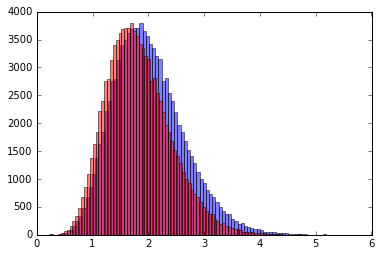

In [4]:
plt.hist(Tx, 100, color ='blue', alpha = 0.5); # on ne trace que 100 valeurs pour des questions de lisibilité
plt.hist(Sx, 100, color ='red' , alpha = 0.5);

t = "Moyenne de Tx : "+str(np.mean(Tx));
print(t);
s = "Moyenne de Sx : "+str(np.mean(Sx));
print(s);

<h5>d)</h5>

In [5]:
L1 = np.zeros(10**5);
Lalpha = np.zeros(10**5);
for i in range(0,10**5):
    L1[i] = (Tx[i]-1/0.5)**2;
    Lalpha[i] = (Sx[i]-1/0.5)**2;

<h5>e)</h5>
<br />On rappelle que :
$$
\begin{align}
R(\theta,T) &= \frac{1}{n\theta^2} \\
R(\theta,S_{\alpha}) &= \frac{n-2n\alpha+(n+1)\alpha^2}{n\theta^2}
\end{align}
$$
Ce qui donne les valeurs :

In [6]:
Rt = 1/(10 * (0.5)**2); 
Rs = (11*(10/11)**2 - 2*10/11*10 + 10)/ (10 * (0.5)**2);
print("Risque de T : "+str(Rt));
print("Risque de S : "+str(Rs));

Risque de T : 0.4
Risque de S : 0.36363636363636404


Calculons d'autre part les valeurs expérimentales :

In [7]:
Rtexp = np.mean(L1);
Rsexp = np.mean(Lalpha);
print("Risque expérimental pour T : "+str(Rtexp));
print("Risque expérimental pour S : "+str(Rsexp));

Risque expérimental pour T : 0.40092202519
Risque expérimental pour S : 0.363661977582


Théoriquement comme numériquement, on observe bien :
$$R(\theta,S_{\alpha^*}) < R(\theta,T)$$

<h5>e)</h5>

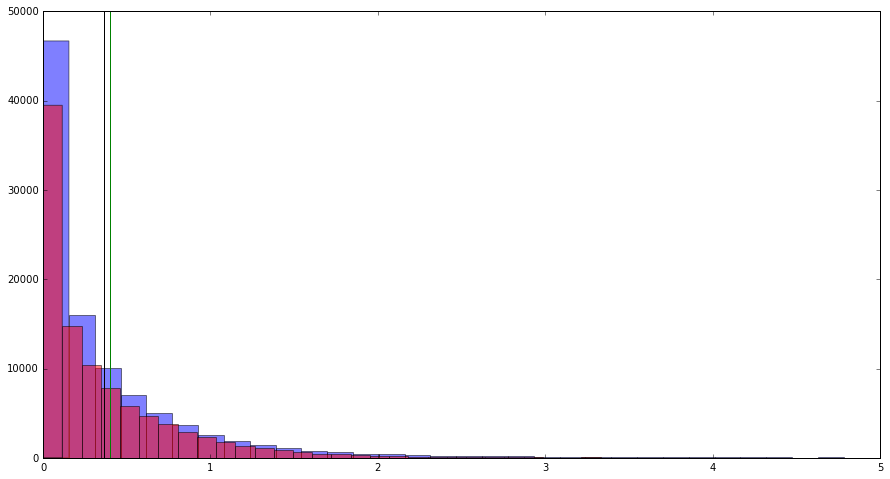

In [9]:
plt.figure(figsize = (15,8)); # agrandissment du graphique car on ne voyait pas grand chose de base

plt.hist(L1,100, color ='blue', alpha = 0.5 );
plt.hist(Lalpha,100, color ='red' ,alpha = 0.5);
plt.plot([np.mean(L1),np.mean(L1)],[0,50000], color="green", alpha=1);
plt.plot([np.mean(Lalpha),np.mean(Lalpha)],[0,50000], color="black", alpha=1)
plt.xlim([0,5])
plt.show()

On constate graphiquement que $R(\theta,S_{\alpha^*})$ (en noir) est légèrement inférieur à $R(\theta,T)$ (en vert).

<br /><h2>III - Exercice 2</h2>
<h4>Question 1</h4>
<br />Le modèle $\mathcal{P}$ est dominé par la mesure de comptage.

<h4>Question 2</h4>
<br />Commençons par noter : $$S_n(y) = \sum_{i=1}^{n}y_i$$
Calculons maintenant la loi a posteriori :
$$
\begin{align}
\pi(\theta|y) &= \frac{\pi(\theta)\frac{\theta^{S_{n}(y)}}{\prod_{i = 1}^{n}y_{i}}e^{-n\theta}}{\int_{0}^{+\infty} \pi(t)\frac{t^{S_{n}(y)}}{\prod_{i = 1}^{n}y_{i}}e^{-nt}dt} \\
&= \mathbb{1}_{\theta >0}\frac{\theta^{S_{n}(y) + \alpha -1}e^{-(\beta+n)\theta}}{\int_{0}^{+\infty}t^{S_{n}(y)+\alpha-1}e^{-(\beta+n)t}dt}
\end{align}
$$
Posons : $u = (\beta + n)t$.
<br />Alors l'équation devient :
$$
\begin{align}
\pi(\theta|y) &= \mathbb{1}_{\theta >0}\frac{\theta^{S_{n}(y) + \alpha -1}e^{-(\beta+n)\theta}}{\int_{0}^{+\infty}\frac{1}{(\beta +n)^{\alpha+S_{n}(y)}}u^{\alpha + S_{n}(y) -1}e^{-u}du} \\
&= \mathbb{1}_{\theta >0} \frac{(\beta +n)^{\alpha+S_{n}(y)}}{\Gamma(\alpha+S_{n}(y))}\theta^{\alpha+S_{n}(y)-1}e^{-(\beta + n)\theta}
\end{align}
$$
<br />On obtient finalement : $\pi(\theta|y)\sim \Gamma(\alpha + S_{n}(y), \beta+n)$

<h4>Question 3</h4>
<br />On a pour $n\in\mathbb{N}$ : $$\mathbb{E}_{\pi}(\theta|y) = \frac{\alpha + S_{n}(y)}{\beta+n}$$
<br />$T(Y) = \mathbb{E}_{\pi}(\theta|Y)$ peut être considéré comme un estimateur de $\theta_0$ car elle représente la valeur de $\theta$ la plus probable d'après les données, et donc la plus proche de sa vraie valeur $\theta_0$.

<h5>Question 4</h5>
<br />Pour $n\in\mathbb{N}$, on a :
$$
\begin{align}
T(Y^n) &= \frac{\alpha + \sum_{i=1}^{n}y_{i}}{\beta +n} \\
&= \frac{\alpha}{\beta +n} + \frac{n}{\beta + n}(\frac{1}{n}\sum_{i=1}^{n}y_{i})
\end{align}
$$
Or : $\frac{\alpha}{\beta +n} \xrightarrow[n \to +\infty]{} 0$ et $\frac{n}{\beta + n} \xrightarrow[n \to +\infty]{} 1$.
<br /><br />De plus, la loi des grands nombres donne : $$\frac{1}{n}\sum_{i=1}^{n}y_{i} \xrightarrow[n \to +\infty]{} \theta_{0}$$
<br /><br />On a donc bien $T(Y^n) \xrightarrow[n \to +\infty]{} \theta_{0}$.

<h4>Question 5</h4>
<h5>a)</h5>

In [10]:
Y = np.random.poisson(0.5,500);
grille = np.arange(0,5,0.01);

<h5>b)</h5>

Quand n augmente, la loi a posteriori se concentre autour de $\theta_0$, ce qui est bien conforme aux prédictions.

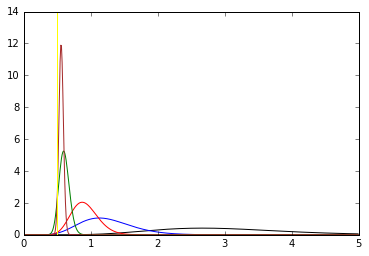

In [11]:
plt.plot(grille, sp.gamma.pdf(grille, 9,scale =1/3), color = 'black'); # prior
# on trace maintenant les densités des lois a posteriori
plt.plot(grille, sp.gamma.pdf(grille,9 + np.sum(Y[0:5]),scale =1/(3+5)), color = 'blue');
plt.plot(grille, sp.gamma.pdf(grille,9 + np.sum(Y[0:20]),scale =1/(3+20)), color = 'red');
plt.plot(grille, sp.gamma.pdf(grille,9 + np.sum(Y[0:100]),scale =1/(3+100)), color = 'green');
plt.plot(grille, sp.gamma.pdf(grille,9 + np.sum(Y[0:500]),scale =1/(3+500)), color = 'brown');

plt.plot([0.5,0.5],[0,14], color="yellow"); #ligne indiquant la position de theta0
plt.show()

<h5>c)</h5>

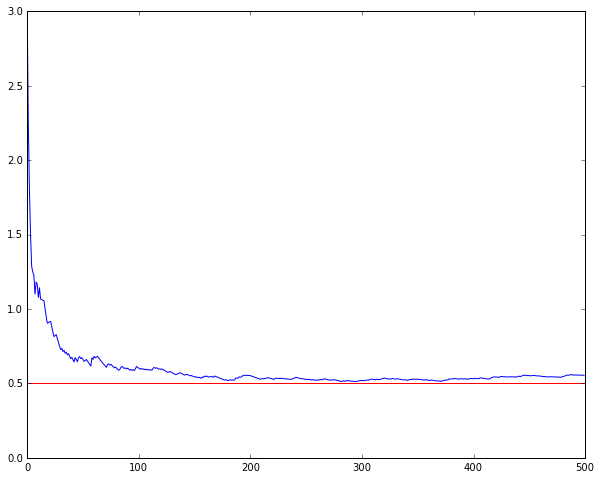

In [12]:
esp = np.zeros(500);
for j in range(500):
    esp[j] = (9 + np.sum(Y[0:j]))/(3 +j);

plt.figure(figsize = (10,8));

plt.plot(range(500),esp);
plt.plot([0,500],[0.5,0.5],color="red"); # valeur de theta0
plt.plot([0,500],[0,0],color="black"); # ligne représentant l'axe des abscisses pour que l'axe des ordonnées commence à 0
plt.show()

On constate que, comme prédit dans la question 4, l'espérance a posteriori converge vers $\theta_0$.

<br /><br />
<h2>IV - Exercice 3</h2>
<h4>Question 1</h4>
<br />Le modèle statistique est :
$$
P_{\theta}(X_{1}) = \left \{
\begin{array}{c @{=} c}
    \theta  &si &X_{1} = 1 \\
    1-\theta &sinon \\
\end{array}
\right.
$$
<br />Pour $n$ observations, la densité s'écrit donc : 
$$
\begin{align}
p_{\theta}(X) &= \prod_{i=1}^{n}\theta^{x_i} \cdot(1-\theta)^{n-x_i} \\
&= \theta^{\sum_{i=1}^{n}x_i}\cdot(1-\theta)^{n^{2} - \sum_{i=1}^{n}x_i}
\end{align}
$$
<br />Les ensembles correspondant respectivement aux hypothèses $H_0$ et $H_1$ sont :
$\Theta_0=\{0.5\}$ et  $\Theta_1=]0,1[~\backslash~\{0.5\}$.

<h4>Question 2</h4>
<br />En tant que somme de variables aléatoires de Bernoulli de paramètre $\theta$ et indépendantes, S(X) suit une loi binomiale : $S(X)\sim\mathcal{B}(n,\theta)$.
<br /><br />On cherche maintenant à exprimer A.
<br />On veut : $$P(\frac{1}{n}S(X) \notin [1 - A, A] |\theta = 0.5) \leqslant \alpha$$
Soit : $$P(S(X) \notin [n(1 - A), nA] |\theta = 0.5) \leqslant \alpha$$
$S(X)$ étant symétrique en $\frac{n}{2}$, la condition devient :
$$
P(S(X) \notin [\frac{n}{2}, nA] |\theta = 0.5) \leqslant \frac{\alpha}{2} \\
\Leftrightarrow P(S(X) \in [\frac{n}{2}, nA] |\theta = 0.5) \geqslant 1-\frac{\alpha}{2}
$$
<br /><br />En notant $F$ la fonction de répartition de $S(X)$ et $F^{\leftarrow}(p)$ son quantile d'ordre $p$, on a donc :
$$nA = F^{\leftarrow}(1-\frac{\alpha}{2}) \Leftrightarrow A = \frac{F^{\leftarrow}(1-\frac{\alpha}{2})}{n}$$

<h4>Question 3</h4>

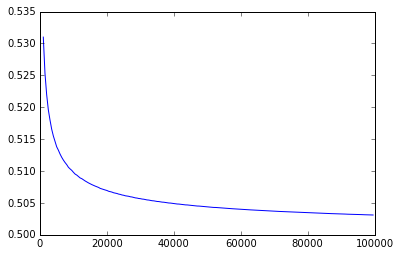

In [13]:
grille = np.arange(10**3,10**5,500);
A = np.zeros(grille.size);
for i in range(A.size):
    A[i] = sp.binom.ppf(1-(5/100)/2,grille[i],0.5)/grille[i];
    
plt.plot(grille,A)
plt.show()

<h4>Question 4</h4>
<br />Le risque de seconde espèce est définit comme la probabilité d'opter pour l'hypothèse nulle alors qu'elle est fausse. Ici, $H_0$ est bien fausse puisque l'on prend $\theta=0.51$ alors que $\Theta_0=\{0.5\}$.
<br />Le risque de seconde espèce s'exprime donc :
$$
\begin{align}
R(\theta=0.51,\delta_n) &= \mathbb{P}_{\theta}(\frac{1}{n}S(X) \in [1-A(n),A(n)]) \\
&= \mathbb{P}_{\theta}(S(X) \in [n - nA(n),nA(n)]) \\
&= F(nA(n))-\mathbb{P}_{\theta}(S(X^n)=nA(n))-F(n-nA(n))
\end{align}
$$
<br />où $F(x)=\mathbb{P}_{\theta}(X\leqslant x)$.

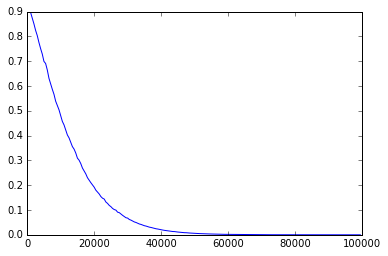

In [14]:
R = np.zeros(grille.size);
for i in range(R.size):
    R[i] = sp.binom.cdf(grille[i]*A[i],grille[i],0.51) - sp.binom.pmf(grille[i]*A[i],grille[i],0.51) - sp.binom.cdf(grille[i]*(1-A[i]),grille[i],0.51);
    
plt.plot(grille,R);

Cherchons maintenant la plus petite valeur de $n$ qui vérifie $\beta(\theta=0.51,\delta_n)\geqslant 0.95$, où $\beta$ est la puissance du test. Elle vérifie alors de manière immédiate $R(\theta=0.51,\delta_n)\leqslant 0.05$.

In [15]:
n = 0 ;
for i in range(grille.size):
    if(R[i] <= 0.05):
        n = grille[i];
        break;
         
print("Valeur de n cherchée : "+str(n));

Valeur de n cherchée : 32500


<h4>Question 5</h4>
<br />On cherche maintenant à obtenir une précision de $\pm$10 pour $n_0$. Il nous faut donc une grille de pas 10 alors que nous en utilisions une de pas 500. Il est inutile de chercher avant 32000 ou après 32500 car nous savons que $n_0$ est compris entre ces deux valeurs.

In [16]:
newGrille = np.arange(32000,32500,10);
A = np.zeros(newGrille.size);
for i in range(A.size):
    A[i] = sp.binom.ppf(1-(5/100)/2,newGrille[i],0.5)/newGrille[i];
    
R = np.zeros(newGrille.size);
for i in range(R.size):
    R[i] = sp.binom.cdf(newGrille[i]*A[i],newGrille[i],0.51) - sp.binom.pmf(newGrille[i]*A[i],newGrille[i],0.51) - sp.binom.cdf(newGrille[i]*(1-A[i]),newGrille[i],0.51);
    
n = 0 ;
for i in range(newGrille.size):
    if(R[i] <= 0.05 ):
        n = newGrille[i];
        break;
         
print("Valeur de n cherchée : "+str(n));

Valeur de n cherchée : 32350


Le choix de A nous assure déjà d'avoir un risque de première espèce inférieur à 0.05. D'après ce que nous venons de faire, nous savons donc que nous aurons les risques de première et de seconde espèce tous deux inférieurs à 0.05 pour un échantillon de sondage de taille 32350.